**Business Case: Walmart - Confidence Interval and CLT**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
To: /content/walmart_data.csv?1641285094
100% 23.0M/23.0M [00:00<00:00, 302MB/s]


In [ ]:
df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
original_df=df
original_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


**Attributes Information**

* User_ID:	User ID
* Product_ID:	Product ID
* Gender:	Sex of User
* Age:	Age in bins
* Occupation:	Occupation(Masked)
* City_Category:	Category of the City (A,B,C)
* StayInCurrentCityYears:	Number of years stay in current city
* Marital_Status:	Marital Status
* ProductCategory:	Product Category (Masked)
* Purchase:	Purchase Amount




**1.1.Defining Problem Statement and Analyzing basic metrics**

**Defining Problem Statement**

* **The Management team at Walmart Inc. wants to analyze the customer purchase behavior. They want to check whether women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).**

**Analyzing basic metrics**

* **Observations on shape of data**

In [ ]:
print(df.shape)

(550068, 10)


* **Observations on data types of all the attributes**

In [ ]:
print(df.dtypes)

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object


* **Insights**

  **1. The user_id,Occupation,Marital_Status,Product_category,Purchase are integer data type**

  **2. The Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years are string data type**

* **Conversion of categorical attributes to 'category'**

In [ ]:
categorical_columns = ['Product_ID','Gender','Age','City_Category','Stay_In_Current_City_Years']
df[categorical_columns] = df[categorical_columns].astype('category')
print(df[categorical_columns])

       Product_ID Gender    Age City_Category Stay_In_Current_City_Years
0       P00069042      F   0-17             A                          2
1       P00248942      F   0-17             A                          2
2       P00087842      F   0-17             A                          2
3       P00085442      F   0-17             A                          2
4       P00285442      M    55+             C                         4+
...           ...    ...    ...           ...                        ...
550063  P00372445      M  51-55             B                          1
550064  P00375436      F  26-35             C                          3
550065  P00375436      F  26-35             B                         4+
550066  P00375436      F    55+             C                          2
550067  P00371644      F  46-50             B                         4+

[550068 rows x 5 columns]


* **Statistical Summary**

In [ ]:
print(df.describe())

            User_ID     Occupation  Marital_Status  Product_Category  \
count  5.500680e+05  550068.000000   550068.000000     550068.000000   
mean   1.003029e+06       8.076707        0.409653          5.404270   
std    1.727592e+03       6.522660        0.491770          3.936211   
min    1.000001e+06       0.000000        0.000000          1.000000   
25%    1.001516e+06       2.000000        0.000000          1.000000   
50%    1.003077e+06       7.000000        0.000000          5.000000   
75%    1.004478e+06      14.000000        1.000000          8.000000   
max    1.006040e+06      20.000000        1.000000         20.000000   

            Purchase  
count  550068.000000  
mean     9263.968713  
std      5023.065394  
min        12.000000  
25%      5823.000000  
50%      8047.000000  
75%     12054.000000  
max     23961.000000  


**1.2.Non-Graphical Analysis: Value counts and unique attributes**

* **Value counts**

In [ ]:
column_to_use=df.columns

for col in column_to_use:
  column_counts=df[col].value_counts().head(5)
  print(f"{col} Value counts :")
  print(column_counts)
  print("************************************")
  print()

User_ID Value counts :
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
Name: User_ID, dtype: int64
************************************

Product_ID Value counts :
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
Name: Product_ID, dtype: int64
************************************

Gender Value counts :
M    414259
F    135809
Name: Gender, dtype: int64
************************************

Age Value counts :
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
Name: Age, dtype: int64
************************************

Occupation Value counts :
4     72308
0     69638
7     59133
1     47426
17    40043
Name: Occupation, dtype: int64
************************************

City_Category Value counts :
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64
************************************

Stay_In_Current_City_Years Value counts :
1     193821
2     101838
3      95285
4

* **Insights**

  **1.There are 414259 are Male customer and 135809 are Female customer.**

  **2.The age group between 26-35 contributes the most to Walmart's purchases accounting for 219,587 followed by the age group between 36-45 which contributes 110,013 purchases.**

* **Unique attributes**

In [ ]:
column_to_use = df.columns

for col in column_to_use:
    column_unique = df[col].nunique()
    print(f"{col} Unique Attributes:",column_unique)

User_ID Unique Attributes: 5891
Product_ID Unique Attributes: 3631
Gender Unique Attributes: 2
Age Unique Attributes: 7
Occupation Unique Attributes: 21
City_Category Unique Attributes: 3
Stay_In_Current_City_Years Unique Attributes: 5
Marital_Status Unique Attributes: 2
Product_Category Unique Attributes: 20
Purchase Unique Attributes: 18105


* **Insights**
  
  **1.There were 3,631 different kinds of products in Walmart's store, categorised under 20 different categories**

  **2.There were 5,891 different user IDs distributed across 7 different age groups**

**1.3.Visual Analysis - Univariate & Bivariate**

*  **Continous Variable**

* **Univariate-->Distplot**

<ipython-input-492-acdba9682fc2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Product_Category'],kde=True,color="green")


Text(0, 0.5, 'Frequency')

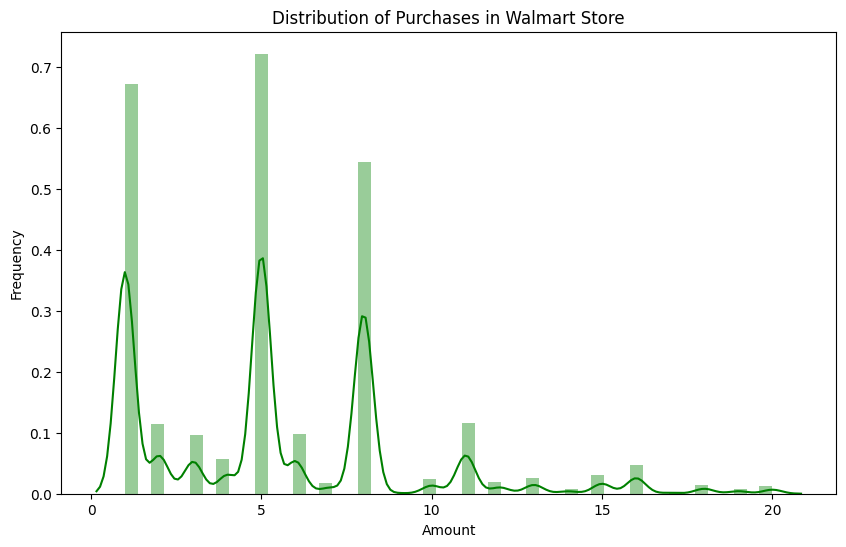

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(df['Product_Category'],kde=True,color="green")
plt.title('Distribution of Purchases in Walmart Store')
plt.xlabel('Amount')
plt.ylabel('Frequency')

*  **Univariate analysis-->Countplot**

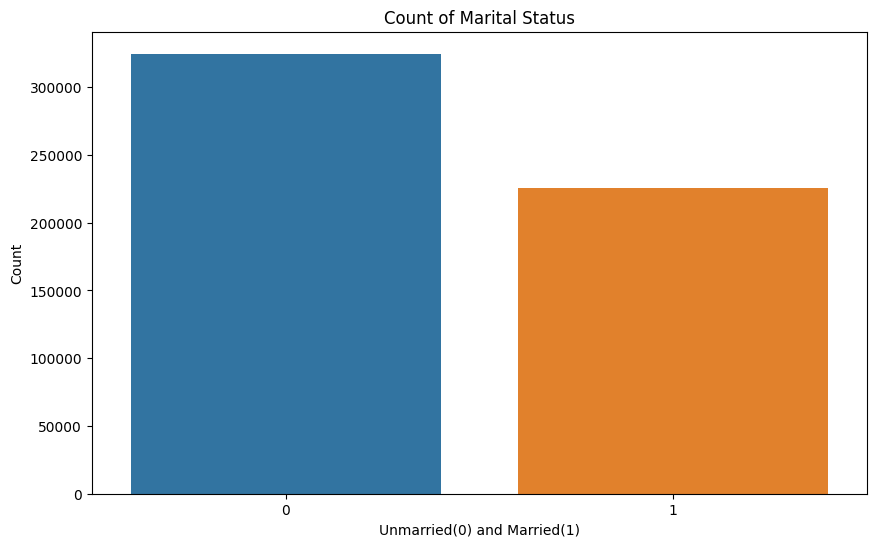

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Marital_Status')
plt.title('Count of Marital Status')
plt.xlabel('Unmarried(0) and Married(1)')
plt.ylabel('Count')
plt.show()

* **Univariate analysis-->Histogram**

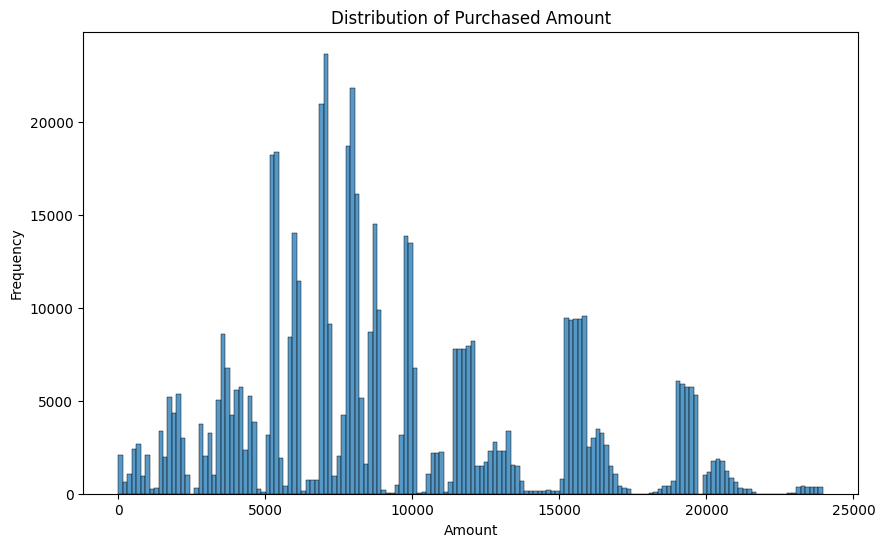

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='Purchase')
plt.title('Distribution of Purchased Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

* **For categorical variable(s): Boxplot**

*  **Univariate--->Boxplot**

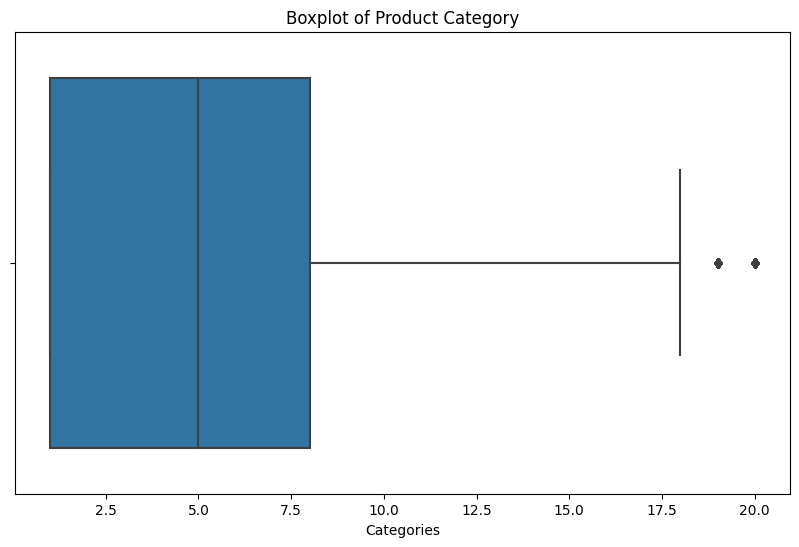

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df,x='Product_Category')
plt.title('Boxplot of Product Category')
plt.xlabel('Categories')
plt.show()

* **Bivariate Analysis--->Boxplot**

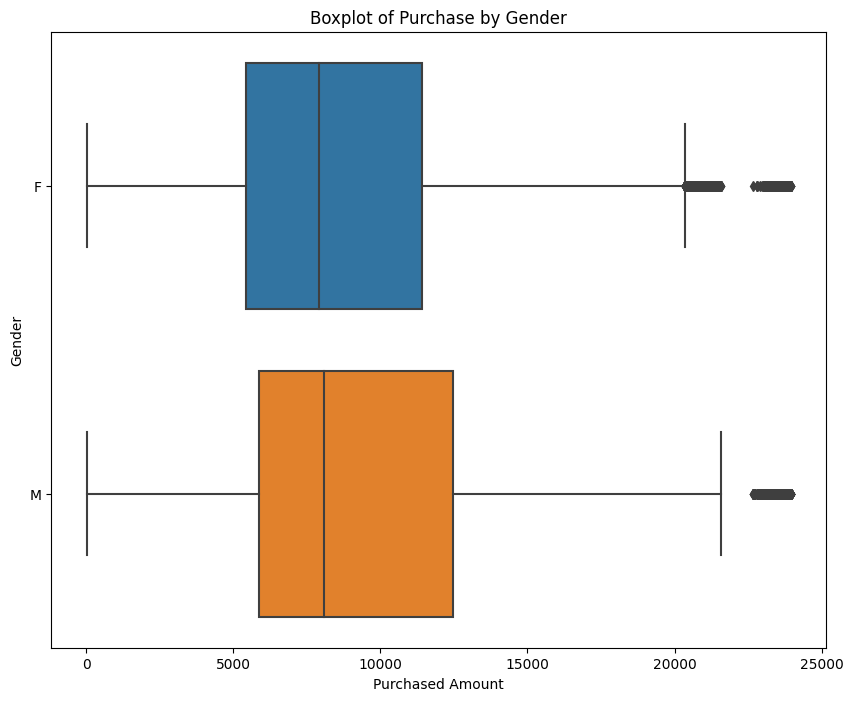

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Purchase", y="Gender",data=df)
plt.title("Boxplot of Purchase by Gender")
plt.xlabel("Purchased Amount")
plt.ylabel("Gender")
plt.show()

*  **Visual Analysis for correlation: Heatmaps, Pairplots**

*  **Heatmaps**

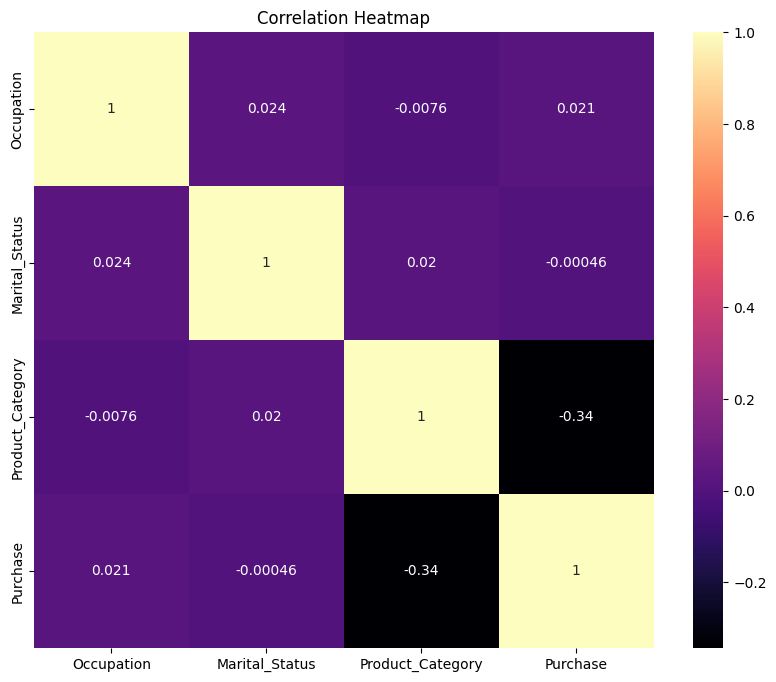

In [ ]:
numerical_columns = ['Occupation','Marital_Status','Product_Category','Purchase']
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma')
plt.title('Correlation Heatmap')
plt.show()

* **Pairplots**

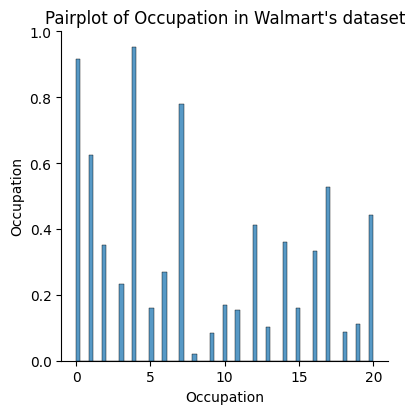

In [ ]:
numerical_column = 'Occupation'
sns.pairplot(df,vars=[numerical_column],height=4)
plt.title("Pairplot of Occupation in Walmart's dataset")
plt.show()

**2.Missing Value & Outlier Detection**

*  **Missing Value**

In [ ]:
Missing_value = df.isnull().sum()
print(Missing_value)

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64


*  **Insights for Missing Value**

   **1.There were no missing values present in the Walmart dataset.**

*  **Outlier Detection**

In [ ]:
Quant1 = df['Purchase'].quantile(0.25)
Quant3 = df['Purchase'].quantile(0.75)
IQR = Quant3 - Quant1
lower_bound = Quant1 - 1.5 * IQR
upper_bound = Quant3 + 1.5 * IQR
outliers = (df['Purchase'] < lower_bound) | (df['Purchase'] > upper_bound)
outlier_count = outliers.sum()
print(f"Number of outliers in Purchase : {outlier_count}")

Number of outliers in Purchase : 2677


* **Insights**

  **1.There are 2677 outliers in purchase column**

**3.Business Insights based on Non- Graphical and Visual Analysis.**

*  **Comments on the range of attributes**

In [ ]:
user_count = df['User_ID'].value_counts().head(5)
user_count1=df['User_ID'].value_counts().tail(5)
print(user_count)
print(user_count1)

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
Name: User_ID, dtype: int64
1002690    7
1002111    7
1005810    7
1004991    7
1000708    6
Name: User_ID, dtype: int64


In [ ]:
product_id_count = df['Product_ID'].value_counts().head(5)
product_id_count1 = df['Product_ID'].value_counts().tail(5)
print(product_id_count)
print(product_id_count1)

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
Name: Product_ID, dtype: int64
P00068742    1
P00012342    1
P00162742    1
P00091742    1
P00231642    1
Name: Product_ID, dtype: int64


In [ ]:
gender_counts = df['Gender'].value_counts()
print(gender_counts)

M    414259
F    135809
Name: Gender, dtype: int64


In [ ]:
age_wise_count = df['Age'].value_counts()
print(age_wise_count)

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64


In [ ]:
occupation_count = df['Occupation'].value_counts().head(5)
occupation_count1 = df['Occupation'].value_counts().tail(5)
print(occupation_count)
print(occupation_count1)

4     72308
0     69638
7     59133
1     47426
17    40043
Name: Occupation, dtype: int64
19    8461
13    7728
18    6622
9     6291
8     1546
Name: Occupation, dtype: int64


In [ ]:
city_category_count = df['City_Category'].value_counts()
print(city_category_count)

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64


In [ ]:
stay_count = df['Stay_In_Current_City_Years'].value_counts()
print(stay_count)

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64


In [ ]:
marital_status_count = round(df['Marital_Status'].value_counts(normalize=True)*100,2)
print(marital_status_count)

0    59.03
1    40.97
Name: Marital_Status, dtype: float64


In [ ]:
total_purchase = df.groupby('Product_Category')['Purchase'].sum().head(5)
total_purchase1 = df.groupby('Product_Category')['Purchase'].sum().tail(5)
print(total_purchase)
print(total_purchase1)

Product_Category
1    1910013754
2     268516186
3     204084713
4      27380488
5     941835229
Name: Purchase, dtype: int64
Product_Category
16    145120612
17      5878699
18      9290201
19        59378
20       944727
Name: Purchase, dtype: int64


In [ ]:
total_purchase = df['Purchase'].sum()
avg_purchase = df['Purchase'].mean()
max_purchase = df['Purchase'].max()
min_purchase = df['Purchase'].min()
print(f"Total purchase :  {total_purchase}")
print(f"Average purchase : {avg_purchase}")
print(f"Maximum purchase : {max_purchase}")
print(f"Minimum purchase :{min_purchase}")

Total purchase :  5095812742
Average purchase : 9263.968712959126
Maximum purchase : 23961
Minimum purchase :12


*  **Business Insights for range of attributes**

     **1.The user_id 1001680 has purchased 1026 times in walmart's store and the user_id with 1000708 has lowest purchase of 6.**

     **2.The product_id P00265242 has purchased by user 1880 times but the product_id P00231642 has purchased only one time by the user.**

     **3.There are 414259 Males and 135809 Females purchased in walmart's store.**

     **4.There were 219587 user in the age group between 26-35 which is higher when compared to the age groups of 55+ which has total user of 21504 and the age group of 0-17 has total user 15102**

     **5.The occupation of mask 4 has 72308 users in walmart store and the occupation of mask 8 has 1546 users**

     **6.The city category of B has 231173 total users followed by city category C (171175) and city category A (147720).**

     **7.There were 193821 users stay in current city for 1 years and for 0 years 74398 users were stayed in current city.**

     **8.Around 59.03 of the users were unmarried and 40.97 users were married.**

     **9.The product_category 1 purchased for the amount of 1910013754 which is the highest sold product_category in the store and the product_category 19 was least purchased category for the amount of 59378.**

     **10.The Total purchased amount was 5095812742 and the Maximum purchased amount was 23961 and the Minimum purchased amount was 12.**

* **Comments on the distribution of the variables and relationship between them**

*  **Distribution of the variables For Numeric attributes**

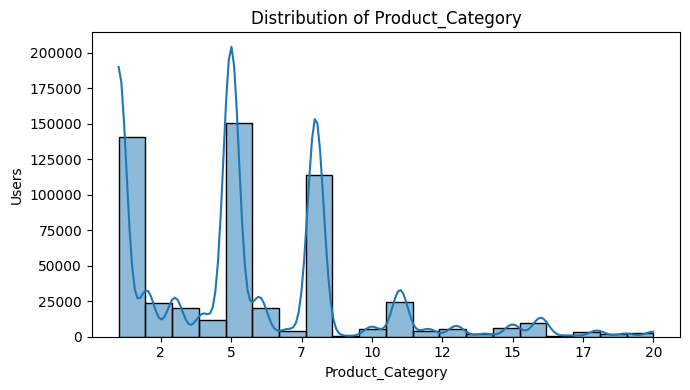

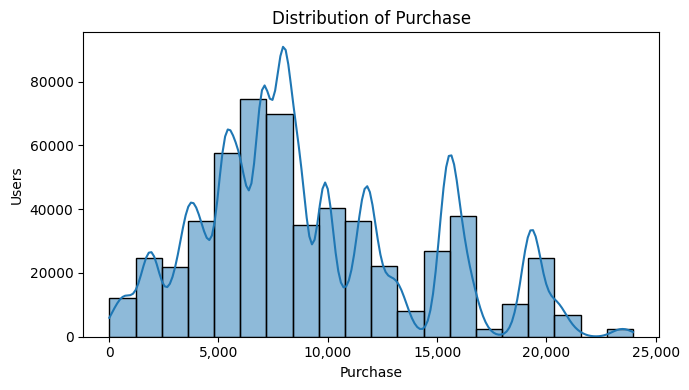

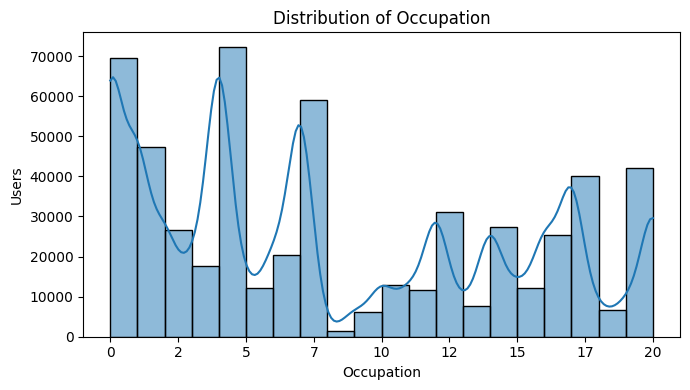

In [ ]:
numeric_col = ['Product_Category','Purchase','Occupation']

for col in numeric_col:
    plt.figure(figsize=(7,4))
    sns.histplot(data=df, x=col,bins=20,kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Users')
    plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    plt.tight_layout()
    plt.show()

*  **Business Insights on the distribution of the variables-->Numeric attributes**

     * **The product categories 1, 5, and 8 have more customers than the rest of the product categories.**
     
     * **From product category 11 onwards, there were very few user purchases in those categories.**
     
     * **The highest purchased product category by users was category 5, with over 200,000 users purchasing products in that category.**
     
     * **Most of the purchase amounts made by users fall in the range of 4,000 to 10,000.**

     * **Approximately 750,000 users made purchases within the 6,000 to 7,000 range, while the least purchased amount by users was in the range of 23,000 to 24,000.**

     * **The highest number occupation fall under the category of 4, with over 70,000 followed by category 0 and category 7.**
     
     * **The least represented occupation was category 8 with less than 5000 users**

*  **Distribution of the variables For Categorical attributes**

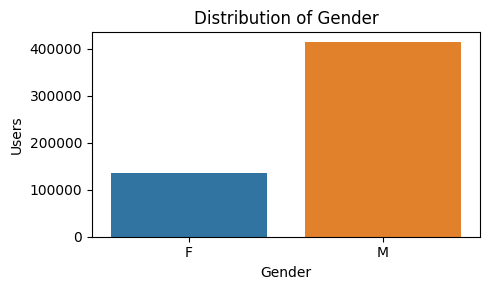

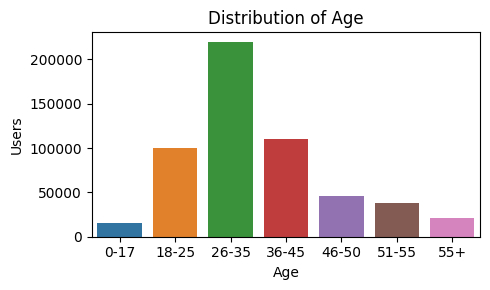

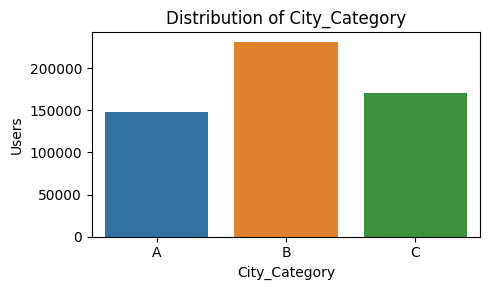

In [ ]:
categorical_col = ['Gender','Age','City_Category']

for col in categorical_col:
    plt.figure(figsize=(5, 3))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Users')
    plt.tight_layout()
    plt.show()

*  **Business Insights on the distribution of the variables-->Categorical attributes**

   * **There are more male users, accounting for over 400,000, while the number of female users falls in the range of 130,000 to 150,000.**

   * **The age group between 26 to 35 has the highest number of users, exceeding 200,000.**
   
   * **while the age groups between 18 to 25 and 36 to 45 each have slightly fewer than 100,000 and above 100,000 users, respectively.**

   * **In terms of city categories, Category B has the most users, totaling above 200,000.**
   
   * **It is followed by the second-highest user count in Category B, which falls between 150,000 and 170,000.**
   


*  **Comments on Relationship between them**

In [ ]:
product_gender = pd.crosstab(df['Gender'], df['Purchase'])
product_gender

Purchase,12,13,14,24,25,26,36,37,38,48,...,23951,23952,23953,23954,23955,23956,23958,23959,23960,23961
Gender,,,,,,,,,,,,,,,,,,,,,
F,27,25,30,28,30,27,36,31,34,33,...,1,0,0,0,1,0,0,1,0,0
M,74,81,65,90,83,85,71,79,80,75,...,0,1,2,2,2,1,4,1,4,3


In [ ]:
product_gender = pd.crosstab(df['Gender'], df['Product_Category'])
product_gender

Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Gender,,,,,,,,,,,,,,,,,,,,
F,24831,5658,6006,3639,41961,4559,943,33558,70,1162,4739,1532,1462,623,1046,2402,62,382,451,723
M,115547,18206,14207,8114,108972,15907,2778,80367,340,3963,19548,2415,4087,900,5244,7426,516,2743,1152,1827


*  **Business Insights for relationship between them**

   *  **Overall, males have a higher total purchase amount than females, especially when it comes to small purchase amounts.**

  *  **Among males,the highest purchased category is Category 1, with 115,547 users. For females,Category 5 takes the lead with 41,961 female users making purchases in this category.**

*  **Comments for each univariate and bivariate plot**

   *  **The most purchased product categories in the Walmart store are 1,5 and 8.**
   *  **Above 300,000 users are unmarried, while the range between 200,000 and 250,000 users consists of married.**
   *  **The highest purchase amounts fall within the range of 5,000 to 8,000.**
   *  **Product categories after 17 are the least purchased by female users.Categories 18 to 20 are not within the expected range, indicating an outlier.**
   *  **For females, the purchase amount tends to be around 20,000, with amounts above that considered outliers. Male purchase amounts range from above 20,000 to below 23,000, with the rest being outliers.**
   *  **There is a moderately strong negative correlation (-0.344) between the Product Category and Purchase.**
   *  **Occupation categories 0, 4, and 7 have the highest number of users, while the least populated categories are 6 and 18.**

**4.Answering questions**

* **4.1.Are women spending more money per transaction than men? Why or Why not?**

In [ ]:
df = df[['Gender','Purchase']]
grouped = df.groupby('Gender').mean()
print(grouped)

           Purchase
Gender             
F       8734.565765
M       9437.526040


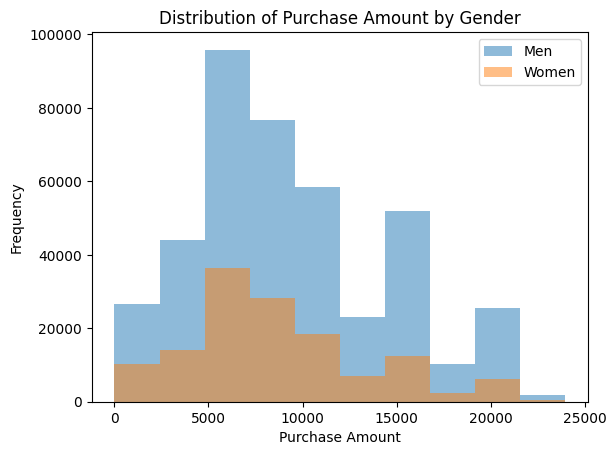

In [ ]:
df = df[['Gender', 'Purchase']]
men = df[df['Gender'] == 'M']['Purchase']
women = df[df['Gender'] == 'F']['Purchase']
plt.hist(men, alpha=0.5, label='Men')
plt.hist(women, alpha=0.5, label='Women')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Purchase Amount by Gender')
plt.legend()
plt.show()

*    **Insights**

       **No,men spending more money transactions then women. This may be because when married couples shop, they often buy for both, and men usually handle the payment. Additionally,the salary gap between men and women can lead to men making larger transactions.**

* **4.2.Confidence intervals and distribution of the mean of the expenses by female and male customers**

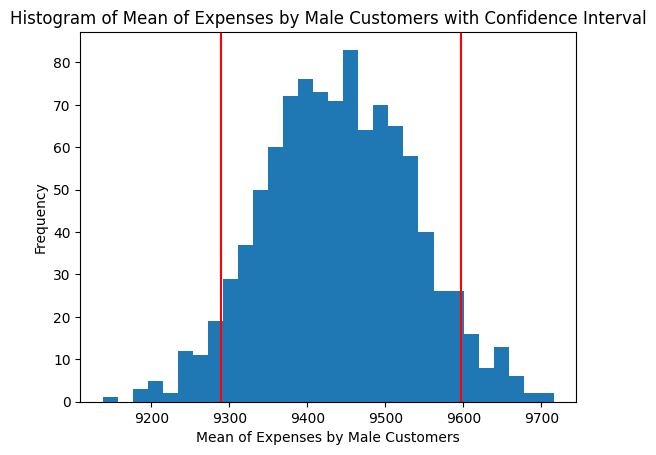


The 90.0% confidence interval of the mean of expenses by male customers is (9289.2731, 9596.413016666667)


In [ ]:
male_df = df[df['Gender'] == 'M']

sample_mean = male_df['Purchase'].mean()
sample_std = male_df['Purchase'].std()


sample_size,confidence_interval=3000,0.90

num_samples = 1000
sample_means = []
for i in range(num_samples):
    samples = np.random.choice(male_df['Purchase'], size=sample_size, replace=True)
    sample_mean = samples.mean()
    sample_means.append(sample_mean)

lower_bound = np.percentile(sample_means, (1 - confidence_interval) / 2 * 100)
upper_bound = np.percentile(sample_means, (1 + confidence_interval) / 2 * 100)

plt.hist(sample_means, bins=30)
plt.axvline(lower_bound, color='red')
plt.axvline(upper_bound, color='red')
plt.title("Histogram of Mean of Expenses by Male Customers with Confidence Interval")
plt.xlabel('Mean of Expenses by Male Customers')
plt.ylabel('Frequency')
plt.show()
print()
print(f'The {confidence_interval * 100}% confidence interval of the mean of expenses by male customers is ({lower_bound}, {upper_bound})')


*    **With 90% confidence, male customers are estimated to spend on average between approximately 9286.61 and 9594.12.**

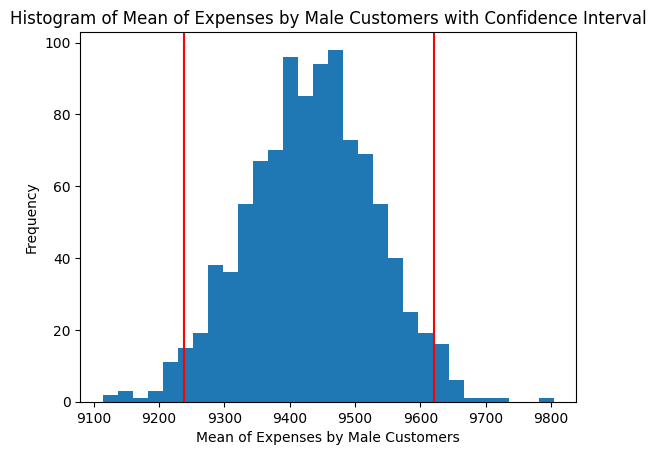


The 95.0% confidence interval of the mean of expenses by male customers is (9237.981458333334, 9620.832658333333)


In [ ]:
male_df = df[df['Gender'] == 'M']

sample_mean = male_df['Purchase'].mean()
sample_std = male_df['Purchase'].std()


sample_size,confidence_interval=3000,0.95

num_samples = 1000
sample_means = []
for i in range(num_samples):
    samples = np.random.choice(male_df['Purchase'], size=sample_size, replace=True)
    sample_mean = samples.mean()
    sample_means.append(sample_mean)

lower_bound = np.percentile(sample_means, (1 - confidence_interval) / 2 * 100)
upper_bound = np.percentile(sample_means, (1 + confidence_interval) / 2 * 100)

plt.hist(sample_means, bins=30)
plt.axvline(lower_bound, color='red')
plt.axvline(upper_bound, color='red')
plt.title("Histogram of Mean of Expenses by Male Customers with Confidence Interval")
plt.xlabel('Mean of Expenses by Male Customers')
plt.ylabel('Frequency')
plt.show()
print()
print(f'The {confidence_interval * 100}% confidence interval of the mean of expenses by male customers is ({lower_bound}, {upper_bound})')

*    **The 95% confidence interval suggests that on average male customers are likely to spend between approximately 9251 and 9614.**

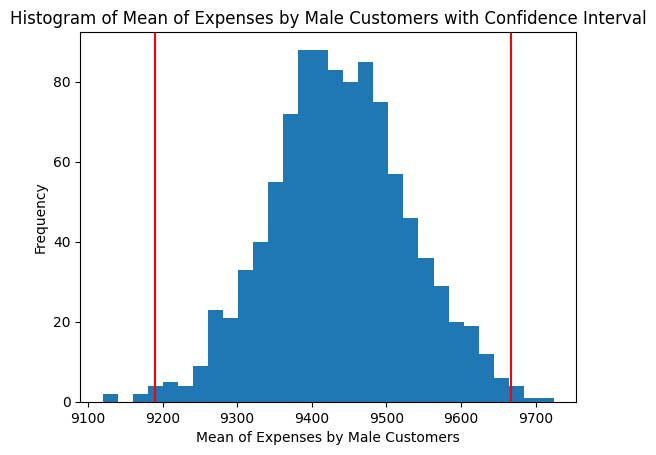


The 99.0% confidence interval of the mean of expenses by male customers is (9189.423535, 9667.28309)


In [ ]:
male_df = df[df['Gender'] == 'M']

sample_mean = male_df['Purchase'].mean()
sample_std = male_df['Purchase'].std()


sample_size,confidence_interval=3000,0.99

num_samples = 1000
sample_means = []
for i in range(num_samples):
    samples = np.random.choice(male_df['Purchase'], size=sample_size, replace=True)
    sample_mean = samples.mean()
    sample_means.append(sample_mean)

lower_bound = np.percentile(sample_means, (1 - confidence_interval) / 2 * 100)
upper_bound = np.percentile(sample_means, (1 + confidence_interval) / 2 * 100)

plt.hist(sample_means, bins=30)
plt.axvline(lower_bound, color='red')
plt.axvline(upper_bound, color='red')
plt.title("Histogram of Mean of Expenses by Male Customers with Confidence Interval")
plt.xlabel('Mean of Expenses by Male Customers')
plt.ylabel('Frequency')
plt.show()
print()
print(f'The {confidence_interval * 100}% confidence interval of the mean of expenses by male customers is ({lower_bound}, {upper_bound})')

*    **The 99% confidence interval for the mean of expenses by male customers which ranges from approximately 9196.65 to 9651.80**

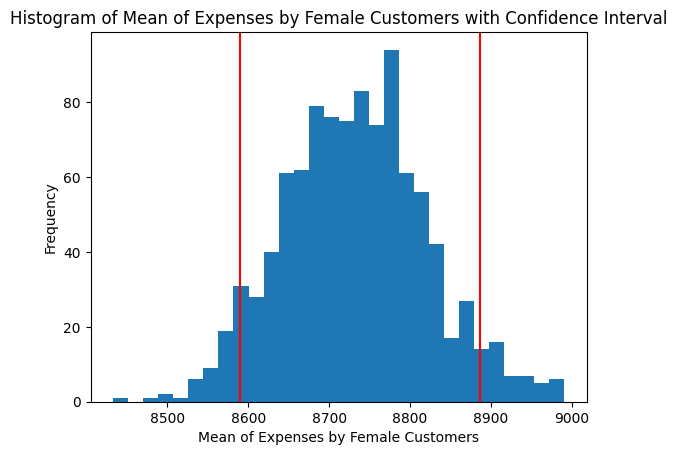


The 90.0% confidence interval of the mean of expenses by Female customers is (8590.194666666666, 8886.3503)


In [ ]:
female_df = df[df['Gender'] == 'F']

sample_mean = female_df['Purchase'].mean()
sample_std = female_df['Purchase'].std()


sample_size,confidence_interval=3000,0.90

num_samples = 1000
sample_means = []
for i in range(num_samples):
    samples = np.random.choice(female_df['Purchase'], size=sample_size, replace=True)
    sample_mean = samples.mean()
    sample_means.append(sample_mean)

lower_bound = np.percentile(sample_means, (1 - confidence_interval) / 2 * 100)
upper_bound = np.percentile(sample_means, (1 + confidence_interval) / 2 * 100)

plt.hist(sample_means, bins=30)
plt.axvline(lower_bound, color='red')
plt.axvline(upper_bound, color='red')
plt.title("Histogram of Mean of Expenses by Female Customers with Confidence Interval")
plt.xlabel('Mean of Expenses by Female Customers')
plt.ylabel('Frequency')
plt.show()
print()
print(f'The {confidence_interval * 100}% confidence interval of the mean of expenses by Female customers is ({lower_bound}, {upper_bound})')

*    **The 90% confidence interval for the mean of expenses by Female customers which ranges from approximately 8592.17 to 8877.74**

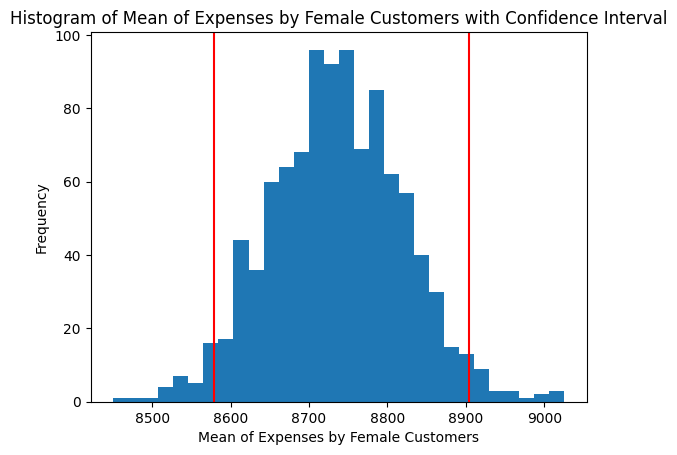


The 95.0% confidence interval of the mean of expenses by Female customers is (8578.3214, 8903.644416666668)


In [ ]:
female_df = df[df['Gender'] == 'F']

sample_mean = female_df['Purchase'].mean()
sample_std = female_df['Purchase'].std()


sample_size,confidence_interval=3000,0.95

num_samples = 1000
sample_means = []
for i in range(num_samples):
    samples = np.random.choice(female_df['Purchase'], size=sample_size, replace=True)
    sample_mean = samples.mean()
    sample_means.append(sample_mean)

lower_bound = np.percentile(sample_means, (1 - confidence_interval) / 2 * 100)
upper_bound = np.percentile(sample_means, (1 + confidence_interval) / 2 * 100)

plt.hist(sample_means, bins=30)
plt.axvline(lower_bound, color='red')
plt.axvline(upper_bound, color='red')
plt.title("Histogram of Mean of Expenses by Female Customers with Confidence Interval")
plt.xlabel('Mean of Expenses by Female Customers')
plt.ylabel('Frequency')
plt.show()
print()
print(f'The {confidence_interval * 100}% confidence interval of the mean of expenses by Female customers is ({lower_bound}, {upper_bound})')

*    **The 95% confidence interval for the mean of expenses by Female customers which ranges from approximately 8565.22 to 8903.04**

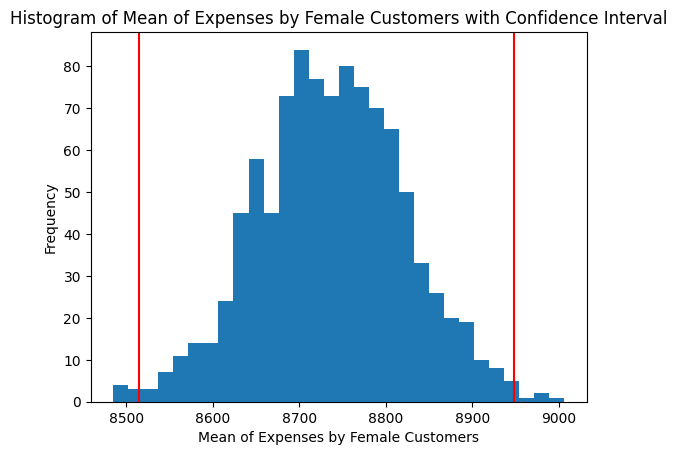


The 99.0% confidence interval of the mean of expenses by Female customers is (8514.900708333334, 8948.354811666666)


In [ ]:
female_df = df[df['Gender'] == 'F']

sample_mean = female_df['Purchase'].mean()
sample_std = female_df['Purchase'].std()


sample_size,confidence_interval=3000,0.99

num_samples = 1000
sample_means = []
for i in range(num_samples):
    samples = np.random.choice(female_df['Purchase'], size=sample_size, replace=True)
    sample_mean = samples.mean()
    sample_means.append(sample_mean)

lower_bound = np.percentile(sample_means, (1 - confidence_interval) / 2 * 100)
upper_bound = np.percentile(sample_means, (1 + confidence_interval) / 2 * 100)

plt.hist(sample_means, bins=30)
plt.axvline(lower_bound, color='red')
plt.axvline(upper_bound, color='red')
plt.title("Histogram of Mean of Expenses by Female Customers with Confidence Interval")
plt.xlabel('Mean of Expenses by Female Customers')
plt.ylabel('Frequency')
plt.show()
print()
print(f'The {confidence_interval * 100}% confidence interval of the mean of expenses by Female customers is ({lower_bound}, {upper_bound})')

*    **The 99% confidence interval for the mean of expenses by Female customers which ranges from approximately 8519.16 to 8954.98**

*  **Business Insights for Confidence intervals and distribution of the mean of the expenses by female and male customers:**

     **Male customers spend more than females,with 90% Confidence interval: [9286.61, 9594.12] for males and 90% Confidence interval: [8592.17, 8877.74] for females showing a wider spending difference.**

**4.3.Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?**

In [ ]:
male_df = df[df['Gender'] == 'M']
female_df = df[df['Gender'] == 'F']

male_mean = male_df['Purchase'].mean()
male_std = male_df['Purchase'].std()
female_mean = female_df['Purchase'].mean()
female_std = female_df['Purchase'].std()

male_sample_size = 3000
female_sample_size = 3000

confidence_level = 0.90

z_critical = stats.norm.ppf((1 + confidence_level) / 2)

male_standard_error = male_std / np.sqrt(male_sample_size)
female_standard_error = female_std / np.sqrt(female_sample_size)

male_margin_of_error = z_critical * male_standard_error
female_margin_of_error = z_critical * female_standard_error

male_confidence_interval = (male_mean - male_margin_of_error, male_mean + male_margin_of_error)
female_confidence_interval = (female_mean - female_margin_of_error, female_mean + female_margin_of_error)

print("Male Confidence Interval:", male_confidence_interval)
print("Female Confidence Interval:", female_confidence_interval)

if (male_confidence_interval[1] >= female_confidence_interval[0] and
        male_confidence_interval[0] <= female_confidence_interval[1]):
    print("There is an overlap between male and female spending confidence intervals")
else:
    print("There is no overlap between male and female spending confidence intervals")

Male Confidence Interval: (9284.603710699741, 9590.448370244789)
Female Confidence Interval: (8591.402025430534, 8877.729504880417)
There is no overlap between male and female spending confidence intervals


In [ ]:
male_df = df[df['Gender'] == 'M']
female_df = df[df['Gender'] == 'F']

male_mean = male_df['Purchase'].mean()
male_std = male_df['Purchase'].std()
female_mean = female_df['Purchase'].mean()
female_std = female_df['Purchase'].std()

male_sample_size = 3000
female_sample_size = 3000

confidence_level = 0.95

z_critical = stats.norm.ppf((1 + confidence_level) / 2)

male_standard_error = male_std / np.sqrt(male_sample_size)
female_standard_error = female_std / np.sqrt(female_sample_size)

male_margin_of_error = z_critical * male_standard_error
female_margin_of_error = z_critical * female_standard_error

male_confidence_interval = (male_mean - male_margin_of_error, male_mean + male_margin_of_error)
female_confidence_interval = (female_mean - female_margin_of_error, female_mean + female_margin_of_error)

print("Male Confidence Interval:", male_confidence_interval)
print("Female Confidence Interval:", female_confidence_interval)

if (male_confidence_interval[1] >= female_confidence_interval[0] and
        male_confidence_interval[0] <= female_confidence_interval[1]):
    print("There is an overlap between male and female spending confidence intervals")
else:
    print("There is no overlap between male and female spending confidence intervals")

Male Confidence Interval: (9255.307845567224, 9619.744235377306)
Female Confidence Interval: (8563.9756474968, 8905.155882814151)
There is no overlap between male and female spending confidence intervals


In [ ]:
male_df = df[df['Gender'] == 'M']
female_df = df[df['Gender'] == 'F']

male_mean = male_df['Purchase'].mean()
male_std = male_df['Purchase'].std()
female_mean = female_df['Purchase'].mean()
female_std = female_df['Purchase'].std()

male_sample_size = 3000
female_sample_size = 3000

confidence_level = 0.99

z_critical = stats.norm.ppf((1 + confidence_level) / 2)

male_standard_error = male_std / np.sqrt(male_sample_size)
female_standard_error = female_std / np.sqrt(female_sample_size)

male_margin_of_error = z_critical * male_standard_error
female_margin_of_error = z_critical * female_standard_error

male_confidence_interval = (male_mean - male_margin_of_error, male_mean + male_margin_of_error)
female_confidence_interval = (female_mean - female_margin_of_error, female_mean + female_margin_of_error)

print("Male Confidence Interval:", male_confidence_interval)
print("Female Confidence Interval:", female_confidence_interval)

if (male_confidence_interval[1] >= female_confidence_interval[0] and
        male_confidence_interval[0] <= female_confidence_interval[1]):
    print("There is an overlap between male and female spending confidence intervals")
else:
    print("There is no overlap between male and female spending confidence intervals")

Male Confidence Interval: (9198.050738998125, 9677.001341946405)
Female Confidence Interval: (8510.372347609497, 8958.759182701455)
There is no overlap between male and female spending confidence intervals


*  **Business Insights for Are confidence intervals of average male and female spending overlapping**

    *    **When the confidence level is 0.90 the Male Confidence Interval lies between 9284.60 and 9590.45 for Female Confidence Interval it lies between 8591.40 and 8877.73**

    *    **When the confidence level is 0.95 the Male Confidence Interval lies between 9255.30 and 9619.74 for Female Confidence Interval it lies between 8563.97 and 8905.15**

    *    **When the confidence level is 0.99 the Male Confidence Interval lies between 9198.05 and 9677.00 for Female Confidence Interval it lies between 8510.37 and 8958.75**

**4.4.Results when the same activity is performed for Married vs Unmarried**

In [ ]:
married_df = original_df[original_df['Marital_Status'] == 1]
unmarried_df = original_df[original_df['Marital_Status'] == 0]

married_mean = married_df['Purchase'].mean()
married_std = married_df['Purchase'].std()
unmarried_mean = unmarried_df['Purchase'].mean()
unmarried_std = unmarried_df['Purchase'].std()

married_sample_size = len(married_df)
unmarried_sample_size = len(unmarried_df)

confidence_level = 0.90

z_critical = stats.norm.ppf((1 + confidence_level) / 2)

married_standard_error = married_std / np.sqrt(married_sample_size)
unmarried_standard_error = unmarried_std / np.sqrt(unmarried_sample_size)

married_margin_of_error = z_critical * married_standard_error
unmarried_margin_of_error = z_critical * unmarried_standard_error

married_confidence_interval = (married_mean - married_margin_of_error, married_mean + married_margin_of_error)
unmarried_confidence_interval = (unmarried_mean - unmarried_margin_of_error, unmarried_mean + unmarried_margin_of_error)

print("Married Confidence Interval:", married_confidence_interval)
print("Unmarried Confidence Interval:", unmarried_confidence_interval)

if (married_confidence_interval[1] >= unmarried_confidence_interval[0] and
        married_confidence_interval[0] <= unmarried_confidence_interval[1]):
    print("There is an overlap between married and unmarried spending confidence intervals.")
else:
    print("There is no overlap between married and unmarried spending confidence intervals.")

Married Confidence Interval: (9243.790713903045, 9278.558434261702)
Unmarried Confidence Interval: (9251.396385823671, 9280.418852019342)
There is an overlap between married and unmarried spending confidence intervals.


In [ ]:
married_df = original_df[original_df['Marital_Status'] == 1]
unmarried_df = original_df[original_df['Marital_Status'] == 0]

married_mean = married_df['Purchase'].mean()
married_std = married_df['Purchase'].std()
unmarried_mean = unmarried_df['Purchase'].mean()
unmarried_std = unmarried_df['Purchase'].std()

married_sample_size = len(married_df)
unmarried_sample_size = len(unmarried_df)

confidence_level = 0.95

z_critical = stats.norm.ppf((1 + confidence_level) / 2)

married_standard_error = married_std / np.sqrt(married_sample_size)
unmarried_standard_error = unmarried_std / np.sqrt(unmarried_sample_size)

married_margin_of_error = z_critical * married_standard_error
unmarried_margin_of_error = z_critical * unmarried_standard_error

married_confidence_interval = (married_mean - married_margin_of_error, married_mean + married_margin_of_error)
unmarried_confidence_interval = (unmarried_mean - unmarried_margin_of_error, unmarried_mean + unmarried_margin_of_error)

print("Married Confidence Interval:", married_confidence_interval)
print("Unmarried Confidence Interval:", unmarried_confidence_interval)

if (married_confidence_interval[1] >= unmarried_confidence_interval[0] and
        married_confidence_interval[0] <= unmarried_confidence_interval[1]):
    print("There is an overlap between married and unmarried spending confidence intervals.")
else:
    print("There is no overlap between married and unmarried spending confidence intervals.")

Married Confidence Interval: (9240.460427057078, 9281.888721107669)
Unmarried Confidence Interval: (9248.61641818668, 9283.198819656332)
There is an overlap between married and unmarried spending confidence intervals.


In [ ]:
married_df = original_df[original_df['Marital_Status'] == 1]
unmarried_df = original_df[original_df['Marital_Status'] == 0]

married_mean = married_df['Purchase'].mean()
married_std = married_df['Purchase'].std()
unmarried_mean = unmarried_df['Purchase'].mean()
unmarried_std = unmarried_df['Purchase'].std()

married_sample_size = len(married_df)
unmarried_sample_size = len(unmarried_df)

confidence_level = 0.99

z_critical = stats.norm.ppf((1 + confidence_level) / 2)

married_standard_error = married_std / np.sqrt(married_sample_size)
unmarried_standard_error = unmarried_std / np.sqrt(unmarried_sample_size)

married_margin_of_error = z_critical * married_standard_error
unmarried_margin_of_error = z_critical * unmarried_standard_error

married_confidence_interval = (married_mean - married_margin_of_error, married_mean + married_margin_of_error)
unmarried_confidence_interval = (unmarried_mean - unmarried_margin_of_error, unmarried_mean + unmarried_margin_of_error)

print("Married Confidence Interval:", married_confidence_interval)
print("Unmarried Confidence Interval:", unmarried_confidence_interval)

if (married_confidence_interval[1] >= unmarried_confidence_interval[0] and
        married_confidence_interval[0] <= unmarried_confidence_interval[1]):
    print("There is an overlap between married and unmarried spending confidence intervals.")
else:
    print("There is no overlap between married and unmarried spending confidence intervals.")

Married Confidence Interval: (9233.951570329937, 9288.39757783481)
Unmarried Confidence Interval: (9243.183129136169, 9288.632108706845)
There is an overlap between married and unmarried spending confidence intervals.


*  **Business Insights for Results when the same activity is performed for Married vs Unmarried**

    *  **When the confidence level is 0.90 the Married Confidence Interval lies between 9243.79 and  9278.55, for Unmarried Confidence Interval it lies between 9251.39 and 9280.41**

    *  **When the confidence level is 0.95 the Married Confidence Interval lies between 9240.46 and 9281.88,for Unmarried Confidence Interval it lies between 9248.61 and 9283.19**

    *  **When the confidence level is 0.99 the Married Confidence Interval lies between 9233.95 and 9288.39,for Unmarried Confidence Interval it lies between 9243.18 and 9288.63**


*  **4.5.Results when the same activity is performed for Age**

In [ ]:
age_groups = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

age_wise_mean_ = []
age_wise_std_ = []
age_wise_sample_size_ = []

for age_group in age_groups:
    age_wise_df = original_df[original_df['Age'] == age_group]
    age_wise_mean = age_wise_df['Purchase'].mean()
    age_wise_std = age_wise_df['Purchase'].std()
    age_wise_sample_size = len(age_wise_df)
    age_wise_mean_.append(age_wise_mean)
    age_wise_std_.append(age_wise_std)
    age_wise_sample_size_.append(age_wise_sample_size)

confidence_level = 0.90

z_critical = stats.norm.ppf((1 + confidence_level) / 2)

age_wise_standard_errors = [age_wise_std_[i] / np.sqrt(age_wise_sample_size_[i]) for i in range(len(age_wise_std_))]

age_wise_margins_of_error = [z_critical * age_wise_standard_errors[i] for i in range(len(age_wise_standard_errors))]

age_wise_confidence_intervals = [(age_wise_mean_[i] - age_wise_margins_of_error[i], age_wise_mean_[i] + age_wise_margins_of_error[i]) for i in range(len(age_wise_mean_))]

for i in range(len(age_groups)):
    print("Age Group:", age_groups[i])
    print("Confidence Interval:", age_wise_confidence_intervals[i])

overlap = False
for i in range(len(age_wise_confidence_intervals)):
    for j in range(i + 1, len(age_wise_confidence_intervals)):
        if (age_wise_confidence_intervals[i][1] >= age_wise_confidence_intervals[j][0] and
                age_wise_confidence_intervals[i][0] <= age_wise_confidence_intervals[j][1]):
            overlap = True
            break

if overlap:
    print("There is an overlap between age group spending confidence intervals.")
else:
    print("There is no overlap between age group spending confidence intervals.")

Age Group: 0-17
Confidence Interval: (8865.053694527898, 9001.87558636205)
Age Group: 18-25
Confidence Interval: (9143.433031607847, 9195.89418091473)
Age Group: 26-35
Confidence Interval: (9235.103000581124, 9270.278265158651)
Age Group: 36-45
Confidence Interval: (9306.441376202305, 9356.260013633442)
Age Group: 46-50
Confidence Interval: (9170.406859081895, 9246.84453585476)
Age Group: 51-55
Confidence Interval: (9492.161430973249, 9577.454630947223)
Age Group: 55+
Confidence Interval: (9280.067707714425, 9392.493211184385)
There is an overlap between age group spending confidence intervals.


In [ ]:
age_groups = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

age_wise_mean_ = []
age_wise_std_ = []
age_wise_sample_size_ = []

for age_group in age_groups:
    age_wise_df = original_df[original_df['Age'] == age_group]
    age_wise_mean = age_wise_df['Purchase'].mean()
    age_wise_std = age_wise_df['Purchase'].std()
    age_wise_sample_size = len(age_wise_df)
    age_wise_mean_.append(age_wise_mean)
    age_wise_std_.append(age_wise_std)
    age_wise_sample_size_.append(age_wise_sample_size)

confidence_level = 0.95

z_critical = stats.norm.ppf((1 + confidence_level) / 2)

age_wise_standard_errors = [age_wise_std_[i] / np.sqrt(age_wise_sample_size_[i]) for i in range(len(age_wise_std_))]

age_wise_margins_of_error = [z_critical * age_wise_standard_errors[i] for i in range(len(age_wise_standard_errors))]

age_wise_confidence_intervals = [(age_wise_mean_[i] - age_wise_margins_of_error[i], age_wise_mean_[i] + age_wise_margins_of_error[i]) for i in range(len(age_wise_mean_))]

for i in range(len(age_groups)):
    print("Age Group:", age_groups[i])
    print("Confidence Interval:", age_wise_confidence_intervals[i])

overlap = False
for i in range(len(age_wise_confidence_intervals)):
    for j in range(i + 1, len(age_wise_confidence_intervals)):
        if (age_wise_confidence_intervals[i][1] >= age_wise_confidence_intervals[j][0] and
                age_wise_confidence_intervals[i][0] <= age_wise_confidence_intervals[j][1]):
            overlap = True
            break

if overlap:
    print("There is an overlap between age group spending confidence intervals.")
else:
    print("There is no overlap between age group spending confidence intervals.")

Age Group: 0-17
Confidence Interval: (8851.947970542686, 9014.981310347262)
Age Group: 18-25
Confidence Interval: (9138.407948753442, 9200.919263769136)
Age Group: 26-35
Confidence Interval: (9231.733676400028, 9273.647589339747)
Age Group: 36-45
Confidence Interval: (9301.669410965314, 9361.031978870433)
Age Group: 46-50
Confidence Interval: (9163.085142648752, 9254.166252287903)
Age Group: 51-55
Confidence Interval: (9483.991472776577, 9585.624589143894)
Age Group: 55+
Confidence Interval: (9269.29883441773, 9403.262084481079)
There is an overlap between age group spending confidence intervals.


In [ ]:
age_groups = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

age_wise_mean_ = []
age_wise_std_ = []
age_wise_sample_size_ = []

for age_group in age_groups:
    age_wise_df = original_df[original_df['Age'] == age_group]
    age_wise_mean = age_wise_df['Purchase'].mean()
    age_wise_std = age_wise_df['Purchase'].std()
    age_wise_sample_size = len(age_wise_df)
    age_wise_mean_.append(age_wise_mean)
    age_wise_std_.append(age_wise_std)
    age_wise_sample_size_.append(age_wise_sample_size)

confidence_level = 0.99

z_critical = stats.norm.ppf((1 + confidence_level) / 2)

age_wise_standard_errors = [age_wise_std_[i] / np.sqrt(age_wise_sample_size_[i]) for i in range(len(age_wise_std_))]

age_wise_margins_of_error = [z_critical * age_wise_standard_errors[i] for i in range(len(age_wise_standard_errors))]

age_wise_confidence_intervals = [(age_wise_mean_[i] - age_wise_margins_of_error[i], age_wise_mean_[i] + age_wise_margins_of_error[i]) for i in range(len(age_wise_mean_))]

for i in range(len(age_groups)):
    print("Age Group:", age_groups[i])
    print("Confidence Interval:", age_wise_confidence_intervals[i])

overlap = False
for i in range(len(age_wise_confidence_intervals)):
    for j in range(i + 1, len(age_wise_confidence_intervals)):
        if (age_wise_confidence_intervals[i][1] >= age_wise_confidence_intervals[j][0] and
                age_wise_confidence_intervals[i][0] <= age_wise_confidence_intervals[j][1]):
            overlap = True
            break

if overlap:
    print("There is an overlap between age group spending confidence intervals.")
else:
    print("There is no overlap between age group spending confidence intervals.")

Age Group: 0-17
Confidence Interval: (8826.333576446717, 9040.59570444323)
Age Group: 18-25
Confidence Interval: (9128.586709366526, 9210.740503156052)
Age Group: 26-35
Confidence Interval: (9225.148523415806, 9280.23274232397)
Age Group: 36-45
Confidence Interval: (9292.342875603326, 9370.358514232421)
Age Group: 46-50
Confidence Interval: (9148.775263210646, 9268.476131726009)
Age Group: 51-55
Confidence Interval: (9468.02375292888, 9601.59230899159)
Age Group: 55+
Confidence Interval: (9248.251682432667, 9424.309236466142)
There is an overlap between age group spending confidence intervals.


**Recommendations**

  *  **Male purchasing amount was higher than Female purchasing amount. So walmart can also focus on giving some offers to both male and Female so they can retain male customer and it can also increase their purchasing amount of Female customer**

  *  **The age group between 26-35 spend more money than others. In order to increase the purchasing amount in other age group walmart can give student discounts to the age group between 0-17 and 18-25.**

  * **There are more unmarried customers than the married ones,so walmart can do some campaign for married couples like home appliances,products for children and offer rewards for family-related purchases.**

  *  **Categories 19 and 20 sell less and are mostly bought by men. To boost sales,we could lower their prices of these categories during  Black Friday week.**

  *  **The occupation category 8 has significantly lower purchase amounts compared to others. So we can encourage them to use credit cards during black friday week and we can offer additional discounts when they pay with cards.**

  *  **In all city categories, males have higher purchase amounts. To boost sales further, we can offer additional cashback rewards to male customers in city categories B, C, and A.**

  *  **Both Male and Female customer who stayed one year in the city have highest purchasing amount so we can offer them 50% discount during black friday week**

  *  **We can promote credit card usage during Black Friday week by offering cashback incentives or additional discounts. This strategy can increase sales for both genders.**